<a href="https://colab.research.google.com/github/jasonkjw/daily_coding_commit/blob/main/hon02_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [3]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [15]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [14]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target,random_state=42)

In [19]:
print(train_input, train_target, test_input, test_target)

[[  29.7  500. ]
 [  12.2   12.2]
 [  33.   700. ]
 [  11.3    8.7]
 [  39.5  925. ]
 [  29.   430. ]
 [  36.   714. ]
 [  36.   850. ]
 [  31.   475. ]
 [  35.   720. ]
 [  37.  1000. ]
 [  11.2    9.8]
 [  34.5  620. ]
 [  12.     9.8]
 [  29.   363. ]
 [  33.   700. ]
 [  30.7  500. ]
 [  38.5  955. ]
 [  33.5  650. ]
 [  14.3   19.7]
 [  31.5  500. ]
 [  25.4  242. ]
 [   9.8    6.7]
 [  32.   600. ]
 [  10.5    7.5]
 [  33.5  610. ]
 [  10.6    7. ]
 [  35.   700. ]
 [  32.   600. ]
 [  35.   725. ]
 [  13.    12.2]
 [  30.   450. ]
 [  32.   340. ]
 [  15.    19.9]
 [  30.   390. ]
 [  41.   975. ]] [1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.] [[ 11.    9.7]
 [ 11.8   9.9]
 [ 29.7 450. ]
 [ 11.8  10. ]
 [ 26.5 340. ]
 [ 12.4  13.4]
 [ 34.  685. ]
 [ 34.  575. ]
 [ 38.5 920. ]
 [ 35.  680. ]
 [ 26.3 290. ]
 [ 31.  500. ]
 [ 41.  950. ]] [0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [5]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [6]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [7]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [8]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [9]:
print(kn.predict([[25,150]]))

[0.]


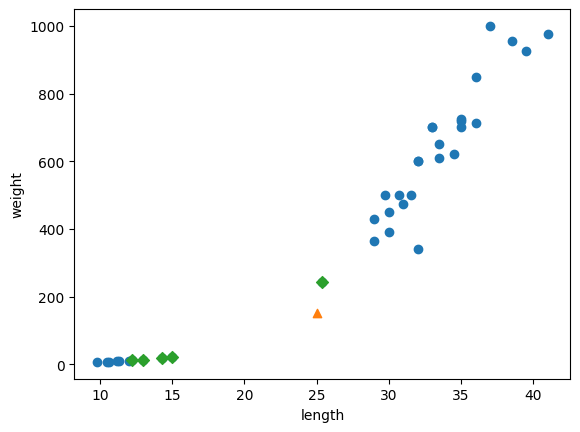

In [24]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
distance, indexes = kn.kneighbors([[25, 150]])
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.show()

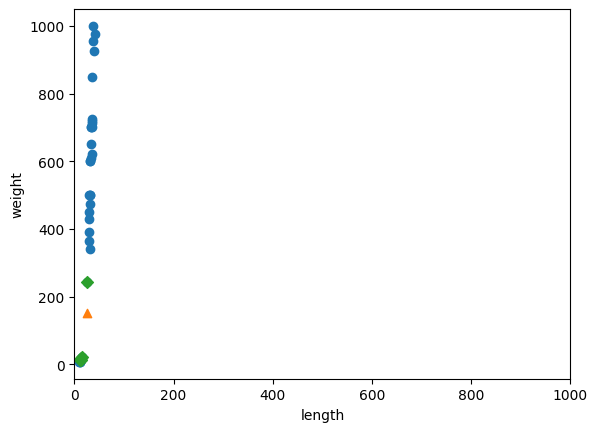

In [25]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
distance, indexes = kn.kneighbors([[25, 150]])
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0,1000))
plt.show()

In [28]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [30]:
train_scaled = (train_input - mean) /std

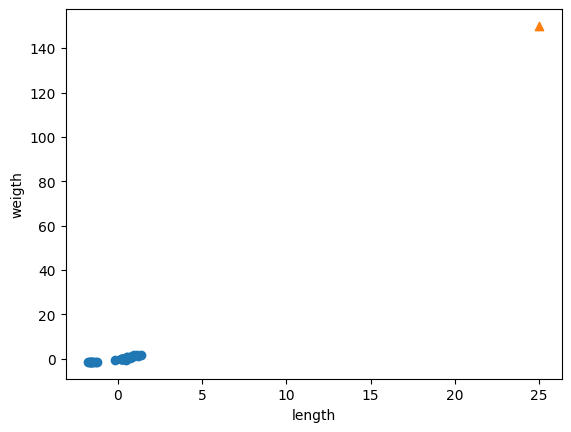

In [31]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()

In [38]:
kn.fit(train_scaled, train_target)
test_scaled = (test_input - mean) /std
new = ([25,150] - mean)/std
distances, indexes = kn.kneighbors([new])

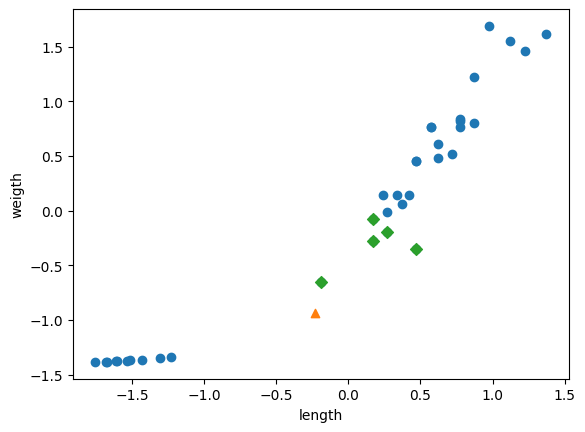

In [39]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()